# Kernel Regression
----
###  Example: 2D polynomial -> 3D plane  

Suppose we have the following quadratic function in $R^2$:

$$ y = x + x^2 $$

Where y is the response variable and x is the independent variable. If we use: $ x_{1} = x$ and $x_{2} = x^2$

Then we have: 
$$ y = x_{1} + x_{2} $$
  
Thus, the quadratic function becomes multi-linear function. Therefore, a non-linear relation between y and x in $R^2$ can be mapped into $R^3$ where the relation is linear, which is a plane in 3-d space.  


<img src='images/2d_to_3d.png' width='600' height ='600' />
  


### Kernel Regression  

In general, non-linear relation data can be mapped into hyperspace where the relation becomes linear in this hyperspace, where we can apply ***linear regression***. Now the problem is how to find the mapping function to match the data. Fortunately, we do not need to look for a mapping function. Instead, we use kernel function.   

Kernel function uses paired mapped data inner product without explicitly computing high-dimensional coordinates of the data. Suppose the $\phi$ is the mapping function. The kernel trick is:  
  
$$ k(x, z) = <\phi(x), \phi(z)> $$

Computing kernel function is much easier than computing explicit mapping data. 

The notebook will use the polynomial kernel for regression problem. 
   
$$k(x_{i}, x_{j}) = (x_{i}\cdot x_{j} + 1)^d$$

where d is the polynomial degree. 


### Commonly used kernel functions

1. polynomial:
$$k(x_{i}, x_{j}) = (x_{i}\cdot x_{j} + 1)^d$$

2. gaussian:
$$k(x_{i}, x_{j}) = exp(-\frac{||x_{i}-x_{j}||^2}{2\sigma^2})$$

3. radical basis function(RBF):
$$k(x_{i}, x_{j}) = exp(-\gamma{||x_{i}-x_{j}||^2})$$
4. Laplacian Kernel
$$k(x_{i}, x_{j}) = exp(-\frac{||x_{i}-x_{j}||}{\sigma})$$


Ref: http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#linear



In fact, kernel trick and kernel function are first used in classification algorithm SVMs. For classification problems, there are linear separable problems and non-linear separable problems. For non-linear separable problems, we can map the data into hyperspace where problems become linear separable. Here is a simple example:

<img src='images/kernel_trick.png' width='400' height='400' />

This is saying that we map the data from 2-d to 3-d space. Non-linear separable data in input space is now linearly separable in hyperspace. For computation, we use kernel functions. We will give more details in Support Vector Machines (SVMs). 

In [16]:
# Import python modules

% matplotlib inline
import math
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise


#  0. Data preparation

x_train (200, 1)
x_test (200, 1)


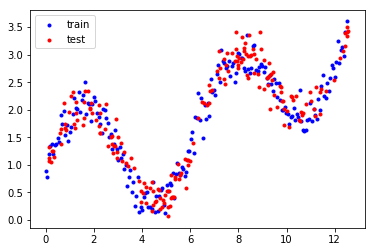

In [17]:
# Read in train and test synthetic data from local storage
x_train = np.loadtxt('datasets/data_train.txt', delimiter = ',', dtype=float)
y_train = np.loadtxt('datasets/label_train.txt', delimiter = ',', dtype=float)

x_test  = np.loadtxt('datasets/data_test.txt', delimiter = ',', dtype=float)
y_test  = np.loadtxt('datasets/label_test.txt', delimiter = ',', dtype=float)

# reshape: from row vector to column vector (100, ) to (100, 1)
x_train = x_train.reshape(-1, 1)  
x_test  = x_test.reshape(-1, 1)

print("x_train", x_train.shape)
print("x_test", x_test.shape)

# display
plt.scatter(x_train, y_train, marker ='.', c ='b', label ='train')
plt.scatter(x_test, y_test, marker ='.', c='r', label = 'test')
plt.legend()

# (1) User-defined poly kernel 

---

We use polynomial:
$$k(x_{i}, y_{j}) = (x_{i}\cdot y_{j} + 1)^d$$

Then, we apply linear regression in hyperspace

In [18]:
# definition for user version of polynomial_kernel defined above
#-----------------------------------------------------------------------------
def polynomial_kernel(X, Y, d):
    '''
    Compute dot product between each row of X and each row of Z
    '''
    m1, _ = X.shape
    m2, _ = Y.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = (np.dot(X[i,:], Y[j,:]) + 1)**d
            
    return K

# use kernel function to compute K(x_train,x_train) and K(x_train, x_test)
# ----------------------------------------------------------------------------
d = 6 # this degree number is used defined

K_train = polynomial_kernel(x_train, x_train, d)
K_test  = polynomial_kernel(x_test,  x_train, d)


In [19]:
# define model and train: Kernel linear regression with Ridge
# ---------------------------------------------------------------
model = sklearn.linear_model.Ridge(alpha=0.1)
model.fit(K_train, y_train)

#  evaluation
#----------------
y_pred = model.predict(K_test)
MSE = np.mean(np.power(y_test - y_pred, 2)) 

print(" Poly d =", d, "        MSE =",  MSE) 



 Poly d = 6         MSE = 0.10012595570979645


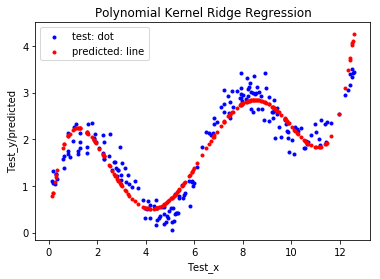

In [20]:
#  define model and train: Kernel linear regression with Ridge
### plot
plt.title("Polynomial Kernel Ridge Regression")
plt.xlabel('Test_x')
plt.ylabel('Test_y/predicted')

plt.scatter( x_test,  y_test, marker ='.', color='b', label="test: dot")
plt.scatter( x_test,  y_pred, marker ='.', color='r', label="predicted: line")

plt.legend()
plt.show()

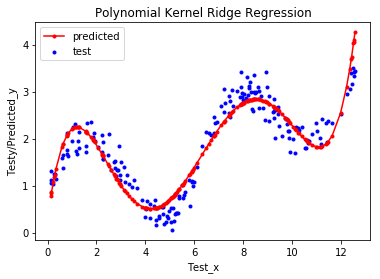

In [21]:
# plot line
sorted_xy = sorted( zip(x_test, y_pred) )

x_sorted = [x for x, _ in sorted_xy]
y_sorted = [y for _, y in sorted_xy]
# unzip is also ok

plt.title("Polynomial Kernel Ridge Regression")
plt.xlabel('Test_x')
plt.ylabel('Testy/Predicted_y')

plt.scatter( x_test,  y_test, marker='.', color='b', label="test")
plt.plot( x_sorted,  y_sorted, marker ='.', color='r', label="predicted")

plt.legend()
plt.show()


## (2) Using built-in kernel function

There are more built-in kernel functions ready to use in sk-learn algorithms. In this case, we do not need to compute the dot product in hyperspace. We use directly the data in input space. 


 RBF kernel          MSE = 0.05028939936065892


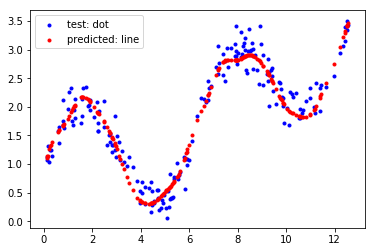

In [22]:
# define model using RBF, use the kernel parameter.
# no need to compute the dot product.  

model = KernelRidge(kernel ='rbf',  alpha=.01) # this alpha is for the Ridge term
model.fit(x_train, y_train)

#  evaluation
#----------------
y_pred = model.predict(x_test)
MSE = np.mean(np.power(y_test - y_pred, 2)) 

print(" RBF kernel ",  "        MSE =",  MSE) 
plt.scatter( x_test,  y_test, marker ='.', color='b', label="test: dot")
plt.scatter( x_test,  y_pred, marker ='.', color='r', label="predicted: line")

plt.legend()
plt.show()

###  Summary
1. Kernel Regression is good for non-linear problem. Bothe built-in kernel and user-defined kernel give good accuray. The graphs show we got a good matching curve line.  
    

2. Radical Basis Function(RBF) performs better by comparing the accuracy, but there are some tuning parameters we can play for both kernel functions.
  
  
3. Users have the possibility to define their own kernel function if needed.

END